In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics 

from sklearn.cluster import DBSCAN
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
%%time 
df_train = pd.read_csv('snli_1.0_train.csv')
df_dev = pd.read_csv('snli_1.0_dev.csv')
df_test = pd.read_csv('snli_1.0_test.csv')

Wall time: 4.89 s


In [3]:
df_train.head()

,gold_label,sentence1_binary_parse,sentence2_binary_parse,sentence1_parse,sentence2_parse,sentence1,sentence2,captionID,pairID,label1,label2,label3,label4,label5
0,neutral,( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...,( ( A person ) ( ( is ( ( training ( his horse...,(ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...,(ROOT (S (NP (DT A) (NN person)) (VP (VBZ is) ...,A person on a horse jumps over a broken down a...,A person is training his horse for a competition.,3416050480.jpg#4,3416050480.jpg#4r1n,neutral,NaN,NaN,NaN,NaN
1,contradiction,( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...,( ( A person ) ( ( ( ( is ( at ( a diner ) ) )...,(ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...,(ROOT (S (NP (DT A) (NN person)) (VP (VBZ is) ...,A person on a horse jumps over a broken down a...,"A person is at a diner, ordering an omelette.",3416050480.jpg#4,3416050480.jpg#4r1c,contradiction,NaN,NaN,NaN,NaN
2,entailment,( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...,"( ( A person ) ( ( ( ( is outdoors ) , ) ( on ...",(ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...,(ROOT (S (NP (DT A) (NN person)) (VP (VBZ is) ...,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse.",3416050480.jpg#4,3416050480.jpg#4r1e,entailment,NaN,NaN,NaN,NaN
3,neutral,( Children ( ( ( smiling and ) waving ) ( at c...,( They ( are ( smiling ( at ( their parents ) ...,(ROOT (NP (S (NP (NNP Children)) (VP (VBG smil...,(ROOT (S (NP (PRP They)) (VP (VBP are) (VP (VB...,Children smiling and waving at camera,They are smiling at their parents,2267923837.jpg#2,2267923837.jpg#2r1n,neutral,NaN,NaN,NaN,NaN
4,entailment,( Children ( ( ( smiling and ) waving ) ( at c...,( There ( ( are children ) present ) ),(ROOT (NP (S (NP (NNP Children)) (VP (VBG smil...,(ROOT (S (NP (EX There)) (VP (VBP are) (NP (NN...,Children smiling and waving at camera,There are children present,2267923837.jpg#2,2267923837.jpg#2r1e,entailment,NaN,NaN,NaN,NaN


In [4]:
print(df_train.columns.shape)
df_train.columns

(14,)


Index(['gold_label', 'sentence1_binary_parse', 'sentence2_binary_parse',
       'sentence1_parse', 'sentence2_parse', 'sentence1', 'sentence2',
       'captionID', 'pairID', 'label1', 'label2', 'label3', 'label4',
       'label5'],
      dtype='object')

In [5]:
 df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550152 entries, 0 to 550151
Data columns (total 14 columns):
gold_label                550152 non-null object
sentence1_binary_parse    550152 non-null object
sentence2_binary_parse    550146 non-null object
sentence1_parse           550152 non-null object
sentence2_parse           550152 non-null object
sentence1                 550152 non-null object
sentence2                 550146 non-null object
captionID                 550152 non-null object
pairID                    550152 non-null object
label1                    550152 non-null object
label2                    39370 non-null object
label3                    39395 non-null object
label4                    39383 non-null object
label5                    36914 non-null object
dtypes: object(14)
memory usage: 58.8+ MB


In [6]:
print("Initial number of data in train: " + str(len(df_train)))
print("Initial number of data in test: " + str(len(df_test)))
print("Initial number of data in dev: " + str(len(df_dev)))


Initial number of data in train: 550152
Initial number of data in test: 10000
Initial number of data in dev: 10000


In [7]:
df_train.head(10)

,gold_label,sentence1_binary_parse,sentence2_binary_parse,sentence1_parse,sentence2_parse,sentence1,sentence2,captionID,pairID,label1,label2,label3,label4,label5
0,neutral,( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...,( ( A person ) ( ( is ( ( training ( his horse...,(ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...,(ROOT (S (NP (DT A) (NN person)) (VP (VBZ is) ...,A person on a horse jumps over a broken down a...,A person is training his horse for a competition.,3416050480.jpg#4,3416050480.jpg#4r1n,neutral,NaN,NaN,NaN,NaN
1,contradiction,( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...,( ( A person ) ( ( ( ( is ( at ( a diner ) ) )...,(ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...,(ROOT (S (NP (DT A) (NN person)) (VP (VBZ is) ...,A person on a horse jumps over a broken down a...,"A person is at a diner, ordering an omelette.",3416050480.jpg#4,3416050480.jpg#4r1c,contradiction,NaN,NaN,NaN,NaN
2,entailment,( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...,"( ( A person ) ( ( ( ( is outdoors ) , ) ( on ...",(ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...,(ROOT (S (NP (DT A) (NN person)) (VP (VBZ is) ...,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse.",3416050480.jpg#4,3416050480.jpg#4r1e,entailment,NaN,NaN,NaN,NaN
3,neutral,( Children ( ( ( smiling and ) waving ) ( at c...,( They ( are ( smiling ( at ( their parents ) ...,(ROOT (NP (S (NP (NNP Children)) (VP (VBG smil...,(ROOT (S (NP (PRP They)) (VP (VBP are) (VP (VB...,Children smiling and waving at camera,They are smiling at their parents,2267923837.jpg#2,2267923837.jpg#2r1n,neutral,NaN,NaN,NaN,NaN
4,entailment,( Children ( ( ( smiling and ) waving ) ( at c...,( There ( ( are children ) present ) ),(ROOT (NP (S (NP (NNP Children)) (VP (VBG smil...,(ROOT (S (NP (EX There)) (VP (VBP are) (NP (NN...,Children smiling and waving at camera,There are children present,2267923837.jpg#2,2267923837.jpg#2r1e,entailment,NaN,NaN,NaN,NaN
5,contradiction,( Children ( ( ( smiling and ) waving ) ( at c...,( ( The kids ) ( are frowning ) ),(ROOT (NP (S (NP (NNP Children)) (VP (VBG smil...,(ROOT (S (NP (DT The) (NNS kids)) (VP (VBP are...,Children smiling and waving at camera,The kids are frowning,2267923837.jpg#2,2267923837.jpg#2r1c,contradiction,NaN,NaN,NaN,NaN
6,contradiction,( ( A boy ) ( ( is ( ( jumping ( on skateboard...,( ( The boy ) ( ( ( skates down ) ( the sidewa...,(ROOT (S (NP (DT A) (NN boy)) (VP (VBZ is) (VP...,(ROOT (S (NP (DT The) (NN boy)) (VP (VBZ skate...,A boy is jumping on skateboard in the middle o...,The boy skates down the sidewalk.,3691670743.jpg#0,3691670743.jpg#0r1c,contradiction,NaN,NaN,NaN,NaN
7,entailment,( ( A boy ) ( ( is ( ( jumping ( on skateboard...,( ( The boy ) ( ( does ( a ( skateboarding tri...,(ROOT (S (NP (DT A) (NN boy)) (VP (VBZ is) (VP...,(ROOT (S (NP (DT The) (NN boy)) (VP (VBZ does)...,A boy is jumping on skateboard in the middle o...,The boy does a skateboarding trick.,3691670743.jpg#0,3691670743.jpg#0r1e,entailment,NaN,NaN,NaN,NaN
8,neutral,( ( A boy ) ( ( is ( ( jumping ( on skateboard...,( ( The boy ) ( ( is ( wearing ( safety equipm...,(ROOT (S (NP (DT A) (NN boy)) (VP (VBZ is) (VP...,(ROOT (S (NP (DT The) (NN boy)) (VP (VBZ is) (...,A boy is jumping on skateboard in the middle o...,The boy is wearing safety equipment.,3691670743.jpg#0,3691670743.jpg#0r1n,neutral,NaN,NaN,NaN,NaN
9,neutral,( ( An ( older man ) ) ( ( ( sits ( with ( ( h...,( ( An ( older man ) ) ( ( ( drinks ( his juic...,(ROOT (S (NP (DT An) (JJR older) (NN man)) (VP...,(ROOT (S (NP (DT An) (JJR older) (NN man)) (VP...,An older man sits with his orange juice at a s...,An older man drinks his juice as he waits for ...,4804607632.jpg#0,4804607632.jpg#0r1n,neutral,NaN,NaN,NaN,NaN


In [8]:
print("Number of null of each column in Train")
df_train.isnull().sum()

Number of null of each column in Train


gold_label                     0
sentence1_binary_parse         0
sentence2_binary_parse         6
sentence1_parse                0
sentence2_parse                0
sentence1                      0
sentence2                      6
captionID                      0
pairID                         0
label1                         0
label2                    510782
label3                    510757
label4                    510769
label5                    513238
dtype: int64

In [9]:
print("Number of null of each column in Test")
df_test.isnull().sum()

Number of null of each column in Test


gold_label                 0
sentence1_binary_parse     0
sentence2_binary_parse     0
sentence1_parse            0
sentence2_parse            0
sentence1                  0
sentence2                  0
captionID                  0
pairID                     0
label1                     0
label2                     0
label3                     0
label4                     0
label5                    10
dtype: int64

In [10]:
print("Number of null of each column in Dev")
df_dev.isnull().sum()

Number of null of each column in Dev


gold_label                 0
sentence1_binary_parse     0
sentence2_binary_parse     0
sentence1_parse            0
sentence2_parse            0
sentence1                  0
sentence2                  0
captionID                  0
pairID                     0
label1                     0
label2                     0
label3                     0
label4                     0
label5                    14
dtype: int64

In [11]:
print("There are 6 null values in sentence_2 binary parse column")
df_train = df_train.dropna(subset = ['sentence2_binary_parse'])

There are 6 null values in sentence_2 binary parse column


In [12]:
df_train.isnull().sum()

gold_label                     0
sentence1_binary_parse         0
sentence2_binary_parse         0
sentence1_parse                0
sentence2_parse                0
sentence1                      0
sentence2                      0
captionID                      0
pairID                         0
label1                         0
label2                    510776
label3                    510751
label4                    510763
label5                    513232
dtype: int64

In [13]:
print("Length of contradiction: " + str(len("contradiction")))
print("Length of neutral: " + str(len("neutral")))
print("Length of entailment: " + str(len("entailment")))


Length of contradiction: 13
Length of neutral: 7
Length of entailment: 10


In [14]:
df_train['gold_label'].unique()

array(['neutral', 'contradiction', 'entailment', '-'], dtype=object)

In [15]:
%%time 
from functools import reduce

invalid_row_position = df_train[(df_train['gold_label'] !="contradiction")
                      & (df_train['gold_label'] !="entailment")
                     & (df_train['gold_label'] !="neutral")].index
df_train.drop(invalid_row_position , inplace=True)
df_train.shape

Wall time: 343 ms


(549361, 14)

In [16]:
%%time
print("Drop unused columns: captionID and pairID")
df_train= df_train.drop(['captionID', 'pairID'], axis = 1)
df_test= df_test.drop(['captionID', 'pairID'], axis = 1)
df_dev= df_dev.drop(['captionID', 'pairID'], axis = 1)

Drop unused columns: captionID and pairID
Wall time: 145 ms


In [17]:
df_train.head(5)

,gold_label,sentence1_binary_parse,sentence2_binary_parse,sentence1_parse,sentence2_parse,sentence1,sentence2,label1,label2,label3,label4,label5
0,neutral,( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...,( ( A person ) ( ( is ( ( training ( his horse...,(ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...,(ROOT (S (NP (DT A) (NN person)) (VP (VBZ is) ...,A person on a horse jumps over a broken down a...,A person is training his horse for a competition.,neutral,NaN,NaN,NaN,NaN
1,contradiction,( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...,( ( A person ) ( ( ( ( is ( at ( a diner ) ) )...,(ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...,(ROOT (S (NP (DT A) (NN person)) (VP (VBZ is) ...,A person on a horse jumps over a broken down a...,"A person is at a diner, ordering an omelette.",contradiction,NaN,NaN,NaN,NaN
2,entailment,( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...,"( ( A person ) ( ( ( ( is outdoors ) , ) ( on ...",(ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...,(ROOT (S (NP (DT A) (NN person)) (VP (VBZ is) ...,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse.",entailment,NaN,NaN,NaN,NaN
3,neutral,( Children ( ( ( smiling and ) waving ) ( at c...,( They ( are ( smiling ( at ( their parents ) ...,(ROOT (NP (S (NP (NNP Children)) (VP (VBG smil...,(ROOT (S (NP (PRP They)) (VP (VBP are) (VP (VB...,Children smiling and waving at camera,They are smiling at their parents,neutral,NaN,NaN,NaN,NaN
4,entailment,( Children ( ( ( smiling and ) waving ) ( at c...,( There ( ( are children ) present ) ),(ROOT (NP (S (NP (NNP Children)) (VP (VBG smil...,(ROOT (S (NP (EX There)) (VP (VBP are) (NP (NN...,Children smiling and waving at camera,There are children present,entailment,NaN,NaN,NaN,NaN


In [18]:
%%time
print("Convert sentences to type String and Label to type Categorical")
for pos in range(12):
    if (pos == 0) or (pos>6):
        print(df_train.columns[pos])
        df_train[df_train.columns[pos]] = df_train[df_train.columns[pos]].astype('category')
    elif(pos>0 and pos <7):
        print(df_train.columns[pos])
        df_train[df_train.columns[pos]] = df_train[df_train.columns[pos]].astype('str')

Convert sentences to type String and Label to type Categorical
gold_label
sentence1_binary_parse
sentence2_binary_parse
sentence1_parse
sentence2_parse
sentence1
sentence2
label1
label2
label3
label4
label5
Wall time: 1.19 s


In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 549361 entries, 0 to 550151
Data columns (total 12 columns):
gold_label                549361 non-null category
sentence1_binary_parse    549361 non-null object
sentence2_binary_parse    549361 non-null object
sentence1_parse           549361 non-null object
sentence2_parse           549361 non-null object
sentence1                 549361 non-null object
sentence2                 549361 non-null object
label1                    549361 non-null category
label2                    38592 non-null category
label3                    38621 non-null category
label4                    38608 non-null category
label5                    36424 non-null category
dtypes: category(6), object(6)
memory usage: 32.5+ MB


## Export clean training, dev, and testing dataset 

In [20]:
%time
export_csv = df_train.to_csv (r'Export_CSV\training_clean.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path
export_csv = df_dev.to_csv (r'Export_CSV\dev_clean.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path
export_csv = df_test.to_csv (r'Export_CSV\testing_clean.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

Wall time: 0 ns


## Check balancing between each class (entailment, contradiction, neutral)

In [21]:
df_train['gold_label'].value_counts()


entailment       183414
contradiction    183185
neutral          182762
Name: gold_label, dtype: int64

In [22]:
label_graph_df = df_train['gold_label'].value_counts()[:3].rename_axis('Label').reset_index(name='Amount')
label_graph_df

,Label,Amount
0,entailment,183414
1,contradiction,183185
2,neutral,182762


In [23]:
label_graph_df = pd.DataFrame(label_graph_df,
                   columns=['Label', 'Amount'])
label_graph_df

,Label,Amount
0,entailment,183414
1,contradiction,183185
2,neutral,182762


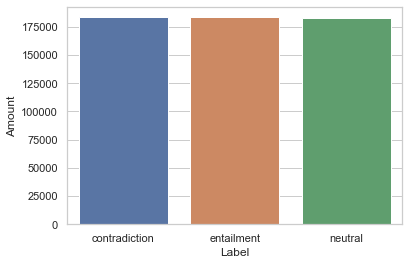

In [24]:
sns.set(style='whitegrid')
label = sns.barplot(x='Label', y='Amount', data=label_graph_df)

## Concat column 'sentence1' and 'sentence2' and find the unique value of two columns

In [25]:
# df_train[['sentence1', 'sentence2']].unique()
df_unique = pd.concat([df_train['sentence1'], df_train['sentence2']]).unique()
df_unique

array(['A person on a horse jumps over a broken down airplane.',
       'Children smiling and waving at camera',
       'A boy is jumping on skateboard in the middle of a red bridge.',
       ..., 'A man in a bodysuit is competing in a surfing competition.',
       'A man in a business suit is heading to a board meeting.',
       'On the beautiful blue water there is a man in a bodysuit surfing.'],
      dtype=object)

## Convert all to lower case and remove punctuation. Then, split into token

In [26]:
%%time 
from nltk.tokenize import RegexpTokenizer

pattern = r'\w+'
tokenizer = RegexpTokenizer(pattern)
words = []
for row in df_unique:
    words.append(tokenizer.tokenize(row))
  
words[:1]

Wall time: 3.31 s


[['A',
  'person',
  'on',
  'a',
  'horse',
  'jumps',
  'over',
  'a',
  'broken',
  'down',
  'airplane']]

## Convert to lowercase

In [27]:
%%time 
lower_words = []
for sentence in words:
    for word in sentence:
        lower_words.append(word.lower())
        
lower_words[:20]

Wall time: 1.24 s


['a',
 'person',
 'on',
 'a',
 'horse',
 'jumps',
 'over',
 'a',
 'broken',
 'down',
 'airplane',
 'children',
 'smiling',
 'and',
 'waving',
 'at',
 'camera',
 'a',
 'boy',
 'is']

## Downloading averaged_perceptron_tagger

In [28]:
import nltk
# Downloading averaged_perceptron_tagger
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ZYLON\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [29]:
%%time 
tag_words = nltk.pos_tag(lower_words)
tag_words[:20]

Wall time: 3min 50s


[('a', 'DT'),
 ('person', 'NN'),
 ('on', 'IN'),
 ('a', 'DT'),
 ('horse', 'NN'),
 ('jumps', 'NN'),
 ('over', 'IN'),
 ('a', 'DT'),
 ('broken', 'JJ'),
 ('down', 'RP'),
 ('airplane', 'NN'),
 ('children', 'NNS'),
 ('smiling', 'VBG'),
 ('and', 'CC'),
 ('waving', 'VBG'),
 ('at', 'IN'),
 ('camera', 'NN'),
 ('a', 'DT'),
 ('boy', 'NN'),
 ('is', 'VBZ')]

## Stemming and Lemmatization using NLTK 

### Downloading wordnet pakage

In [30]:
# For downloading wordnet pakage
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ZYLON\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [31]:
%%time 
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

def transfer_tag(word_tag):
    if word_tag.startswith('j' or 'J'):
        return 'a'
    elif word_tag.startswith('v' or 'V'):
        return 'v'
    elif word_tag.startswith('n' or 'N'):
        return 'n'
    elif word_tag.startswith('r' or 'R'):
        return 'r'
    else:
#         As default pos in lemmatization is Noun
        return 'n'

# Lemmatization using nltk
wnl = WordNetLemmatizer()
lemma_words = []

for word, tag in nltk.pos_tag(lower_words):
#     Decapitalize the first letter of tag
    first_letter = tag[0].lower()
    wtag = transfer_tag(first_letter)
    if not wtag:
        lemma_words.extend([word])
    else:
        lemma_words.extend([wnl.lemmatize(word, wtag)])

Wall time: 4min 30s


In [32]:
print('Before stemming and lemmatization')
print(lower_words[:20])
print('After stemming and lemmatization')
print(lemma_words[:20])

Before stemming and lemmatization
['a', 'person', 'on', 'a', 'horse', 'jumps', 'over', 'a', 'broken', 'down', 'airplane', 'children', 'smiling', 'and', 'waving', 'at', 'camera', 'a', 'boy', 'is']
After stemming and lemmatization
['a', 'person', 'on', 'a', 'horse', 'jump', 'over', 'a', 'broken', 'down', 'airplane', 'child', 'smile', 'and', 'wave', 'at', 'camera', 'a', 'boy', 'be']


In [33]:
df_count = pd.DataFrame(data=lemma_words)
word_freq = df_count[0].value_counts()
word_freq[:10]

a         693450
be        365954
the       327686
in        178504
man       135980
on        109213
woman      90687
of         85472
and        77412
people     67502
Name: 0, dtype: int64

In [34]:
%%time
freq_series = pd.Series(word_freq)
df_freq = pd.DataFrame({'Word':word_freq.index, 'Freq':freq_series.values})
df_freq

Wall time: 7 ms


,Word,Freq
0,a,693450
1,be,365954
2,the,327686
3,in,178504
4,man,135980
...,...,...
27411,iwith,1
27412,iceream,1
27413,begger,1
27414,curtsey,1


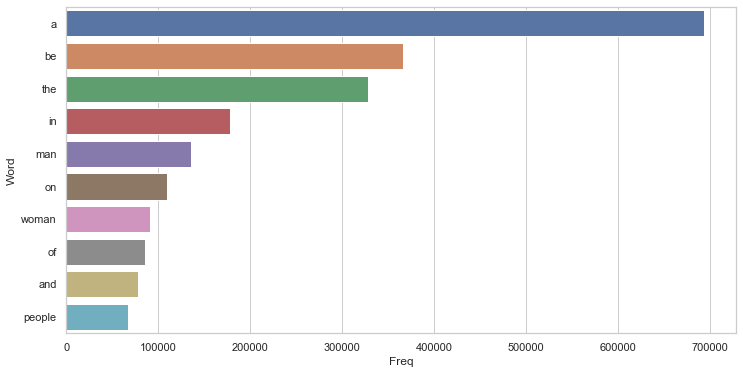

In [35]:
import seaborn as sns

sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Freq', y='Word', data=df_freq[:10])

## Try to remove stopwods then plot again

In [36]:
%%time
# Download package stopwords
nltk.download('stopwords')

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
keywords = ([word for word in lemma_words if word not in stop_words])

# Process to create a dataframe from raw data and list of keywords (list
# of words after removing stopwords)
temp = ','
freq_dist = nltk.FreqDist(keywords)
freq_dist.most_common(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ZYLON\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Wall time: 2.32 s


[('man', 135980),
 ('woman', 90687),
 ('people', 67502),
 ('two', 62056),
 ('play', 43439),
 ('girl', 41303),
 ('boy', 37543),
 ('dog', 36607),
 ('wear', 34577),
 ('sit', 33564)]

## Create a dataframe contain the new freq words with stopwords removed

In [37]:
%%time
data1=[]
data2=[]
for i in range(10):
   data1.append(freq_dist.most_common(10)[i][0]) 

for i in range(10):
   data2.append(freq_dist.most_common(10)[i][1]) 

df_freq2 = pd.DataFrame({'Word':data1, 'Freq':data2})
df_freq2

Wall time: 94 ms


,Word,Freq
0,man,135980
1,woman,90687
2,people,67502
3,two,62056
4,play,43439
5,girl,41303
6,boy,37543
7,dog,36607
8,wear,34577
9,sit,33564


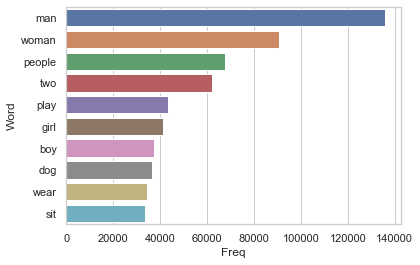

In [38]:
ax2 = sns.barplot(x='Freq', y='Word', data=df_freq2[:10])